In [1]:
# This notebook generates the results in Section 3.1

import matplotlib.pyplot as plt
import numpy as np
from scipy.special import logsumexp
from scipy.special import beta as beta_fun
from expected_cost import ec, utils
from expected_cost.data import create_scores_for_expts
from expected_cost.psrcal_wrappers import Brier, LogLoss

import os 
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin/'
params = {'text.usetex': True} 
plt.rcParams.update(params)

outdir = "outputs"
utils.mkdir_p(outdir)


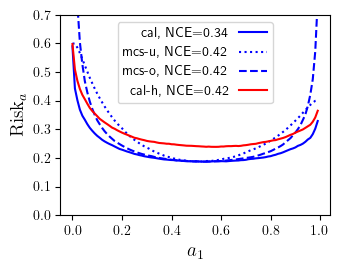

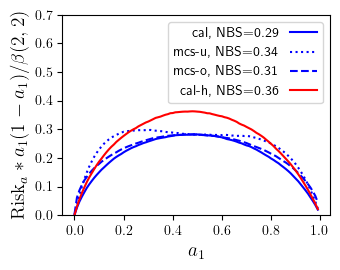

In [2]:
# Plot the Bayes risk as a function of a parameter a_1 that determines the cost

P0 = 0.6
N = 100000
score_dict_underfit, targets_underfit = create_scores_for_expts(2, P0=P0, feat_var=0.15, N=N, simple_names=True, sim_name='gaussian_sim_md', score_scale_mc2=0.48)
score_dict_overfit,  targets_overfit  = create_scores_for_expts(2, P0=P0, feat_var=0.15, N=N, simple_names=True, sim_name='gaussian_sim_md', score_scale_mc2=2.0)
score_dict_harder,   targets_harder   = create_scores_for_expts(2, P0=P0, feat_var=0.19, N=N, simple_names=True, sim_name='gaussian_sim_md')

if np.any(targets_underfit!=targets_harder) or np.any(targets_overfit!=targets_harder): 
    print("Targets are not the same")
targets = targets_harder

scores1 = score_dict_underfit['cal']
scores2 = score_dict_underfit['mcs']
scores3 = score_dict_overfit['mcs']
scores4 = score_dict_harder['cal']

ts = np.arange(0.0001, 0.9999, 0.01)

scores = {'cal': scores1, 
          'mcs-u': scores2, 
          'mcs-o': scores3, 
          'cal-h': scores4}

ces, brs, brisks = {}, {}, {}

for name, sc in scores.items():
    ces[name] = LogLoss(sc, targets)
    brs[name] = Brier(sc, targets)
    brisks[name] = []

for t in ts:
    cost = ec.CostMatrix([[0, 1/(1-t)], [1/t, 0]])
    for name, sc in scores.items():
        brisks[name].append(ec.average_cost_for_bayes_decisions(targets, sc, cost, adjusted=False)[0])

styles = {'cal': 'b-', 'mcs-u': 'b:', 'mcs-o': 'b--', 'cal-h': 'r-'}

fs = 14
plt.figure(figsize=(3.5,2.8))
for name, sc in scores.items():
    plt.plot(ts, brisks[name], styles[name],  label='%s, NCE=%.2f'%(name, ces[name]))
plt.ylim(0,0.7)
plt.xlabel('$a_1$', fontsize=fs)
plt.ylabel('$\mathrm{Risk}_a$', fontsize=fs)
plt.legend(markerfirst=False)
plt.tight_layout()    
plt.savefig(outdir+"/Bayes_error_curves_crossent.pdf")

pt = ts*(1-ts)/beta_fun(2,2)
plt.figure(figsize=(3.5,2.8))
for name, sc in scores.items():
    plt.plot(ts, pt*brisks[name], styles[name],  label='%s, NBS=%.2f'%(name, brs[name]))
plt.ylim(0,0.7)
plt.xlabel('$a_1$', fontsize=fs)
plt.ylabel('$\mathrm{Risk}_a * a_1 (1-a_1)/\\beta(2,2)$', fontsize=fs)
plt.legend(markerfirst=False)
plt.tight_layout()    
plt.savefig(outdir+"/Bayes_error_curves_Brier.pdf")


(0.0, 10.0)

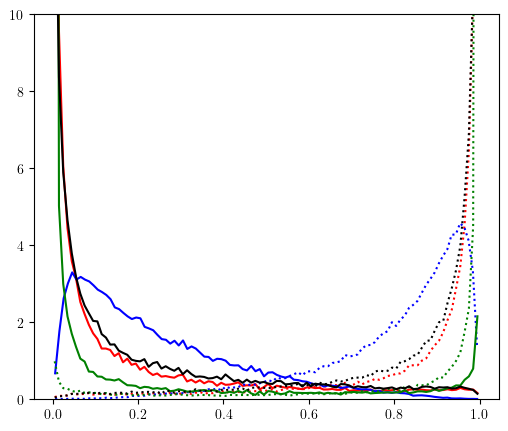

In [3]:
# Plot the resulting distributions

plt.figure(figsize=(6,5))
c, hs = utils.make_hist(targets, np.exp(scores1))
plt.plot(c, hs[1], 'r-', label='Sys A')
plt.plot(c, hs[0], 'r:')

c, hs = utils.make_hist(targets, np.exp(scores2))
plt.plot(c, hs[1], 'b-', label='Sys B')
plt.plot(c, hs[0], 'b:')

c, hs = utils.make_hist(targets, np.exp(scores3))
plt.plot(c, hs[1], 'g-', label='Sys C')
plt.plot(c, hs[0], 'g:')

c, hs = utils.make_hist(targets, np.exp(scores4))
plt.plot(c, hs[1], 'k-', label='Sys D')
plt.plot(c, hs[0], 'k:')


plt.ylim(0, 10)
